In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df=pd.read_csv('dataset/spam.csv', encoding='latin-1')

In [31]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [33]:
# xóa những cột không có giá trị

df=df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

KeyError: "['Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'] not found in axis"

In [34]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [35]:
# đổi tên cột
df=df.rename({'v1':'target', 'v2':'text'}, axis=1)

In [36]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [37]:
# Tạo thêm cột tính len của cột text
len_text=[]
for i in df['text']:
    len_text.append(len(i))
df['text_length']=len_text

In [38]:
df

,target,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       5572 non-null   object
 1   text         5572 non-null   object
 2   text_length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [41]:
df.describe()

,text_length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


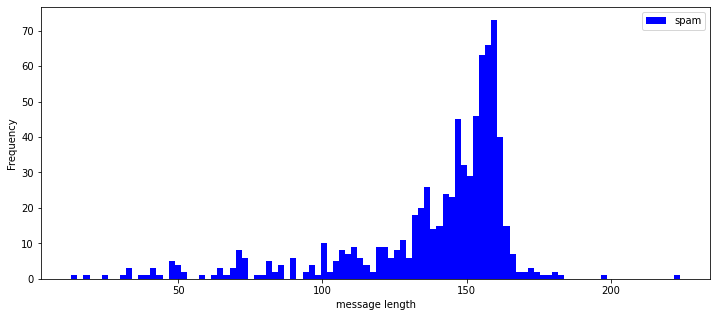

In [51]:
# visualize spam message leght
plt.figure(figsize=(12,5))
df[df['target']=='spam']['text_length'].plot(kind='hist', bins=100, color='blue',label='spam')
plt.legend()
plt.xlabel('message length')
plt.show()

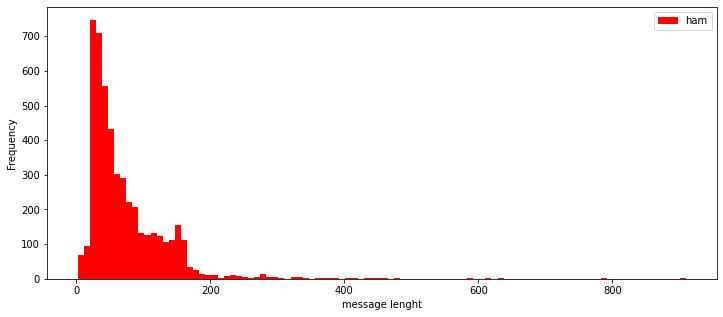

In [50]:
# visualize ham message
plt.figure(figsize=(12,5))
df[df['target']=='ham']['text_length'].plot(kind='hist', bins=100, label='ham', color='red',)
plt.legend()
plt.xlabel('message lenght')
plt.show()

In [52]:
# Từ hai biểu đồ trên ta có thể tháy rằng spam message có số ký tự khoảng 150-200 
# ham message có độ dài ký tự nhỏ hơn

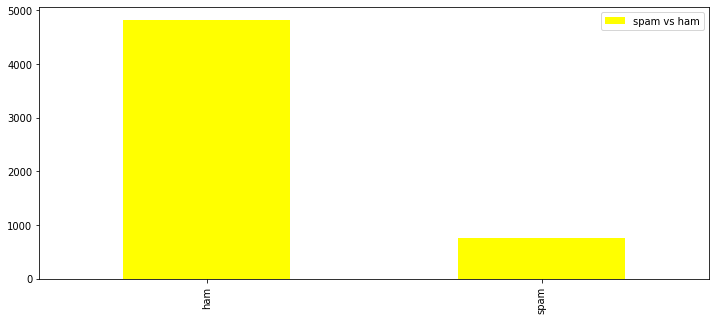

In [58]:
# Số lượng ham message vs spam message
plt.figure(figsize=(12,5))
df['target'].value_counts().plot(kind='bar', color='yellow', label='spam vs ham')
plt.legend()
plt.show()

In [59]:
# from this figure we can see that ham message is more than spam message

In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [61]:
df['target']=np.where(df['target']=='spam',1,0)

In [62]:
spam=[]
ham=[]
spam_class=df[df['target']==1]['text']
ham_class=df[df['target']==0]['text']

In [65]:
spam_class

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

In [66]:
df

,target,text,text_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [72]:
def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words

In [73]:
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words

In [74]:
spam_class.apply(extract_spam)
ham_class.apply(extract_ham)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

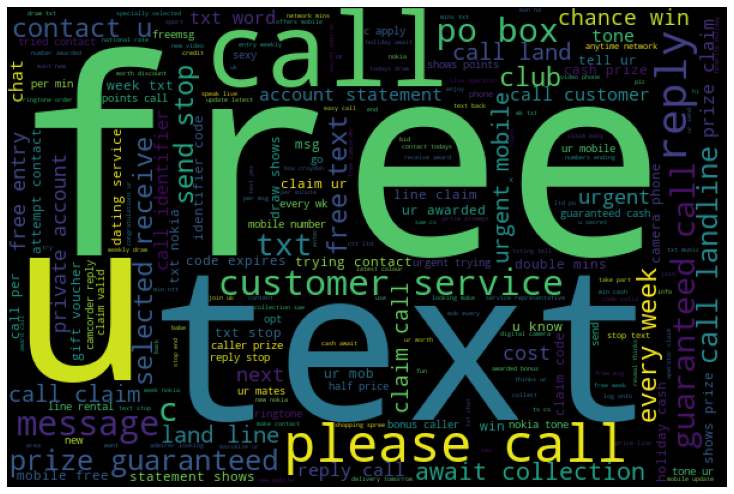

In [76]:
from wordcloud import WordCloud

spam_wordcloud=WordCloud(width=600,height=400).generate(" ".join(spam))
plt.figure(figsize=(10,8))
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

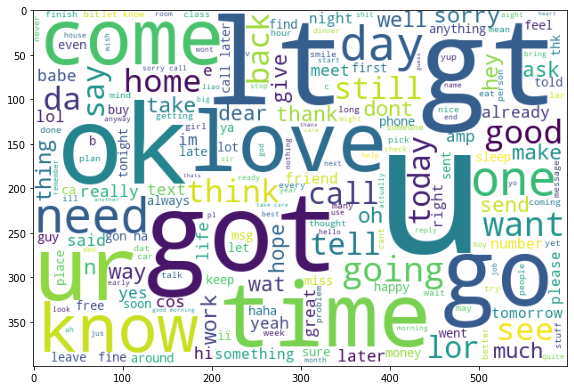

In [79]:
ham_cloud=WordCloud(width=600,height=400,background_color='white').generate(" ".join(ham))
plt.figure(figsize=(10,8))
plt.imshow(ham_cloud)
plt.tight_layout(pad=8)
plt.show()

In [80]:
# Top 10 spam word

spam_words=np.array(spam)

In [81]:
spam_words

array(['free', 'entry', 'wkly', ..., 'call', 'per', 'minute'],
      dtype='<U21')

In [82]:
spam

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 'freemsg',
 'hey',
 'darling',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'six',
 'chances',
 'win',
 'cash',
 'pounds',
 'txt',
 'send',
 'cost',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'lccltd',
 'pobox',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'message',
 'click',
 'http',
 'england

<AxesSubplot:>

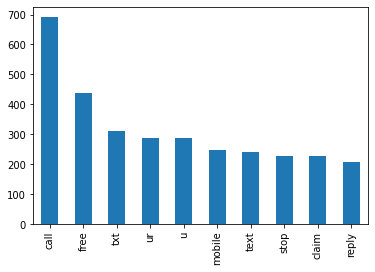

In [85]:
pd.Series(spam_words).value_counts().head(10).plot(kind='bar')

<AxesSubplot:>

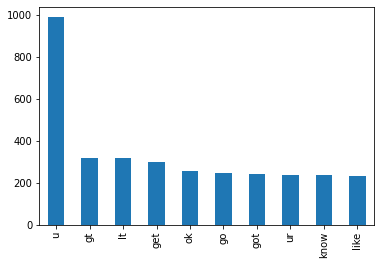

In [86]:
# Top 10 ham word
ham_words=np.array(ham)
pd.Series(ham_words).value_counts().head(10).plot(kind='bar')

c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\wisol\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


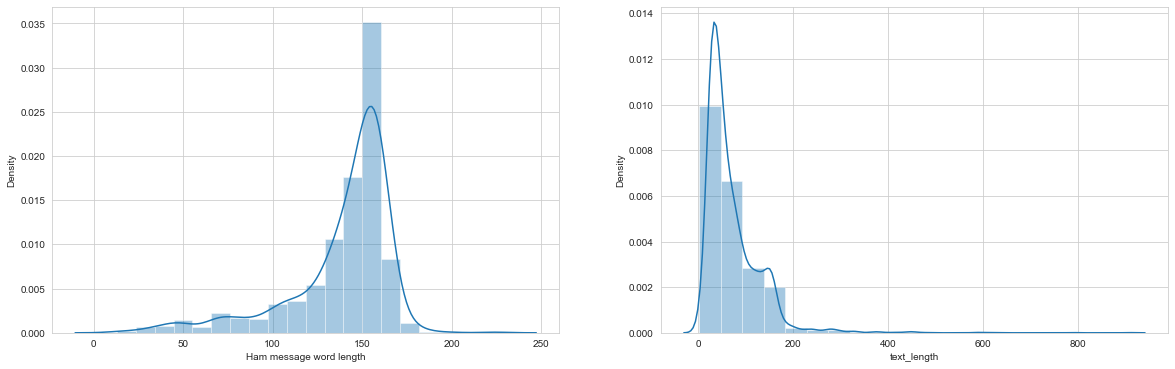

In [93]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax =plt.subplots(1,2, figsize=(20,6))

sns.distplot(df[df['target']==1]['text_length'],bins=20, ax=ax[0])
ax[0].set_xlabel("Spam Message word length")
sns.distplot(df[df['target']==0]['text_length'], bins=20, ax=ax[1])
ax[0].set_xlabel("Ham message word length")
plt.show()

In [94]:
# Xong quá trình visualize 


In [95]:
# sử dụng nltk để xem text meaning
# Stemming is the process of producing morphological variants of a root/base word.
#Stemming programs are commonly referred to as stemming algorithms or stemmers.
#A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.



In [96]:
from nltk.stem import SnowballStemmer
import string

stemmer=SnowballStemmer("english")

def cleanText(message):
    message.translate(str.maketrans('','', string.punctuation))
    words=[stemmer.stem(word) for word in message.split() if 
          word.lower() not in stopwords.words("english")]
    return " ".join(words)
df["text"]=df["text"].apply(cleanText)
df.head(10)

,target,text,text_length
0,0,"go jurong point, crazy.. avail bugi n great wo...",111
1,0,ok lar... joke wif u oni...,29
2,1,free entri 2 wkli comp win fa cup final tkts 2...,155
3,0,u dun say earli hor... u c alreadi say...,49
4,0,"nah think goe usf, live around though",61
5,1,freemsg hey darl 3 week word back! i'd like fu...,148
6,0,even brother like speak me. treat like aid pat...,77
7,0,per request mell mell (oru minnaminungint nuru...,160
8,1,winner!! valu network custom select receivea å...,158
9,1,mobil 11 month more? u r entitl updat latest c...,154


In [97]:
y=df['target']
x=df['text']


In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [99]:
x_train

1114    no:)thi kalli home ground.amla home town durban:)
3589           escap theatr now. . go watch kavalan minut
3095    walk moms. right stagwood pass right wintersto...
1012                 dunno close oredi not... ìï v fan...
3320                                  yo im right yo work
                              ...                        
4931                      match started.india &lt;#&gt; 2
3264    44 7732584351, want new nokia 3510i colour pho...
1653    bugi juz wat... i'm walk home oredi... ìï late...
2607           :-) yeah! lol. luckili star role like you!
2732    dare stupid. wont tell anyth you. hear wont ta...
Name: text, Length: 4457, dtype: object

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)

In [101]:
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test, pred_1)
score_1

0.9766816143497757

In [102]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
score_2

0.9856502242152466

In [103]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
score_3

0.9748878923766816